In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import statsmodels.api as sm

In [3]:
df = pd.read_csv("xyz_hospitals.csv")

**Background/Problem statement** : 

- **Primary Goal** 
 - Recognizing **significant features** that will **identify the reason for hospitalization** for different regions.
 - How well some **variables** such as viral load, smoking, Severity Level **describe the hospitalization charges**
 - Indentifying **patient segments,profiling and formulating collborative strategy with insurance companies**
 - How to **drive revenue** , across patient/serverity categories
       - Data driven discounting feed on insurance among customer segments
         
- **Statistical summary**
 - More **likelihood of high/low hospitalization expenses**
 - Range / Limitation of data  

- **Long term benefits** : Revenue , Customer acquisition  and retention

### Basic Analysis

- **Analysing metrics** - Basic metrics
 - Observations on **shape** of data
 - **Data types** of all the attributes
 - **Conversion** of categorical attributes to 'category' (If required)
 - **Structure & characteristics** of the dataset
 - Statistical summary

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1338 non-null   int64  
 1   age                      1338 non-null   int64  
 2   sex                      1338 non-null   object 
 3   smoker                   1338 non-null   object 
 4   region                   1338 non-null   object 
 5   viral load               1338 non-null   float64
 6   severity level           1338 non-null   int64  
 7   hospitalization charges  1338 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 83.8+ KB


##### Observations on shape of data

In [5]:
df.shape

(1338, 8)

- **Conclusion** - Not a very small size sample 

##### Statistical summary

In [6]:
df.describe()

Unnamed: 0          age   viral load  severity level  \
count  1338.000000  1338.000000  1338.000000     1338.000000   
mean    668.500000    39.207025    10.221233        1.094918   
std     386.391641    14.049960     2.032796        1.205493   
min       0.000000    18.000000     5.320000        0.000000   
25%     334.250000    27.000000     8.762500        0.000000   
50%     668.500000    39.000000    10.130000        1.000000   
75%    1002.750000    51.000000    11.567500        2.000000   
max    1337.000000    64.000000    17.710000        5.000000   

       hospitalization charges  
count              1338.000000  
mean              33176.058296  
std               30275.029296  
min                2805.000000  
25%               11851.000000  
50%               23455.000000  
75%               41599.500000  
max              159426.000000

In [7]:
df.describe(include=object)

sex smoker     region
count   1338   1338       1338
unique     2      2          4
top     male     no  southeast
freq     676   1064        364

##### Not converting of categorical attributes to 'category' for the interest of statistical hypothesis test.  

### Non-Graphical Analysis

In [8]:
df.head()

Unnamed: 0  age     sex smoker     region  viral load  severity level  \
0           0   19  female    yes  southwest        9.30               0   
1           1   18    male     no  southeast       11.26               1   
2           2   28    male     no  southeast       11.00               3   
3           3   33    male     no  northwest        7.57               0   
4           4   32    male     no  northwest        9.63               0   

   hospitalization charges  
0                    42212  
1                     4314  
2                    11124  
3                    54961  
4                     9667

In [9]:
df["region"].value_counts(normalize=True)*100

southeast    27.204783
southwest    24.289985
northwest    24.289985
northeast    24.215247
Name: region, dtype: float64

In [10]:
df["smoker"].value_counts(normalize=True)*100

no     79.521674
yes    20.478326
Name: smoker, dtype: float64

- **Observation** 
 - Unbalanced smokers/non-smokers groups

In [11]:
df["sex"].value_counts(normalize=True)*100

male      50.523169
female    49.476831
Name: sex, dtype: float64

- **Observation** 
 - Balanced gender categories / groups

In [12]:
df["age"].value_counts(normalize=True)*100

18    5.156951
19    5.082212
50    2.167414
51    2.167414
47    2.167414
46    2.167414
45    2.167414
20    2.167414
48    2.167414
52    2.167414
22    2.092676
49    2.092676
54    2.092676
53    2.092676
21    2.092676
26    2.092676
24    2.092676
25    2.092676
28    2.092676
27    2.092676
23    2.092676
43    2.017937
29    2.017937
30    2.017937
41    2.017937
42    2.017937
44    2.017937
31    2.017937
40    2.017937
32    1.943199
33    1.943199
56    1.943199
34    1.943199
55    1.943199
57    1.943199
37    1.868460
59    1.868460
58    1.868460
36    1.868460
38    1.868460
35    1.868460
39    1.868460
61    1.718984
60    1.718984
63    1.718984
62    1.718984
64    1.644245
Name: age, dtype: float64

- **Observation** 
 - Balanced age group samples 

- **Feature types by data type** 

In [13]:
continious_features = df.select_dtypes(include=['int64','float64']).columns
continious_features

Index(['Unnamed: 0', 'age', 'viral load', 'severity level',
       'hospitalization charges'],
      dtype='object')

### Missing Value Detection

- **Missing value detection** 

In [14]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False)

column_name  percent_missing
Unnamed: 0                            Unnamed: 0              0.0
age                                          age              0.0
sex                                          sex              0.0
smoker                                    smoker              0.0
region                                    region              0.0
viral load                            viral load              0.0
severity level                    severity level              0.0
hospitalization charges  hospitalization charges              0.0

- **Insights** : 
 - Zero missing values , good quality data
 - No missing value treatments required 

### Outlier Detection &  Treatment Consideration

In [15]:
column_name = "hospitalization charges" 

Q1=df[column_name].quantile(0.25)
Q3=df[column_name].quantile(0.75)

IQR=Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

lower_outliers = df[(df[column_name]<= lower)]
upper_outliers = df[(df[column_name]>= upper)]

In [16]:
lower_outliers

Empty DataFrame
Columns: [Unnamed: 0, age, sex, smoker, region, viral load, severity level, hospitalization charges]
Index: []

In [17]:
upper_outliers.index

Int64Index([  14,   19,   23,   29,   30,   34,   38,   39,   49,   53,
            ...
            1241, 1249, 1284, 1288, 1291, 1300, 1301, 1303, 1313, 1323],
           dtype='int64', length=139)

In [18]:
df.drop(upper_outliers.index,inplace = True)

In [19]:
upper_outliers = df[(df[column_name]>= upper)]

- **Conclusion** 
 - **Outliers impacts mean based statistical methods**
 - **Going ahead with outlier removal** 
 - However, post outlier removal on dependent feature "hospitalization charges" , **still there are outliers exists in independent feature level e.g. severity level, sex , smoker generation group etc.** (please refer below boxplots for more clarity)
  - **Removing** those **outliers iteratively , can result loss of significant feature**
  - **Need domain expert consultation** before removing indepndent feature based outliers
  - Hence **proceeding with Baseline analysis with outliers**
  - Moreover, few deep learning model can work without outliers , hence skipping outlier removal

In [20]:
df.shape

(1199, 8)

### Feature Engineering 

In [21]:
# Converting age to generation types - Gen-Z, Millennials, Gen-X etc.
def age_to_generation(age):
    if age >= 10 and age <= 25:
        return 'Gen-Z'
    elif age >= 26 and age <= 32:
        return 'Younger-Millennials'
    elif age >= 33 and age <= 41:
        return 'Older-Millennials'
    else:
        return 'Gen-X' 

In [22]:
df["generation"] = df["age"].apply(age_to_generation)

### Visual Analysis 

<AxesSubplot:xlabel='hospitalization charges', ylabel='Density'>

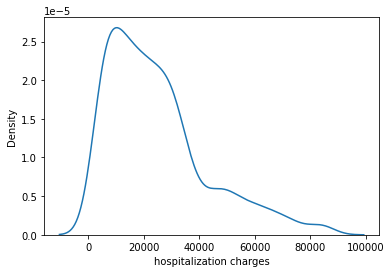

In [23]:
sns.kdeplot(data=df, x="hospitalization charges")

#### Relation between the dependent and independent variable 

- Dependent: **hospitalization charges vs Smoker**

<AxesSubplot:xlabel='smoker', ylabel='hospitalization charges'>

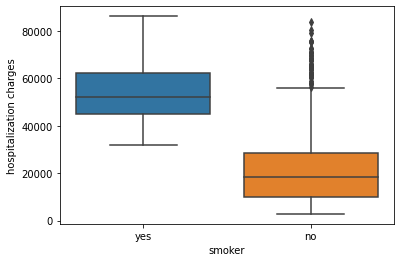

In [24]:
sns.boxplot(data=df, x="smoker", y="hospitalization charges")

- **Observation** Outliers exist for non smokers
    - There is **more hospitalization charges for smokers**

- Dependent: **hospitalization charges & severity level**

<AxesSubplot:xlabel='severity level', ylabel='hospitalization charges'>

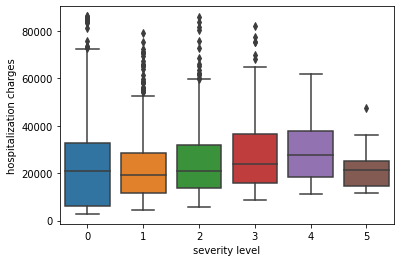

In [25]:
sns.boxplot(data=df, x="severity level", y="hospitalization charges")

<AxesSubplot:xlabel='sex', ylabel='hospitalization charges'>

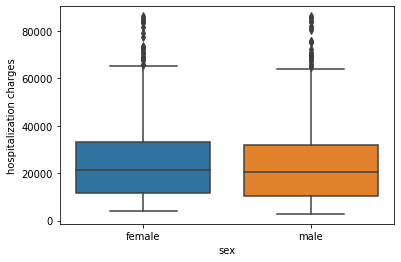

In [26]:
sns.boxplot(data=df, x="sex", y="hospitalization charges")

<AxesSubplot:xlabel='region', ylabel='hospitalization charges'>

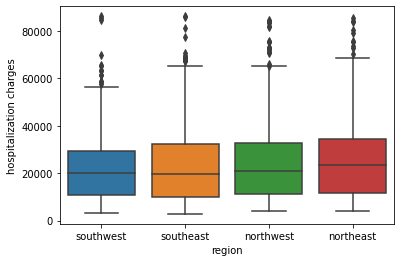

In [27]:
sns.boxplot(data=df, x="region", y="hospitalization charges")

<AxesSubplot:xlabel='generation', ylabel='hospitalization charges'>

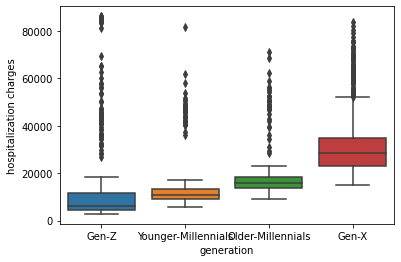

In [28]:
sns.boxplot(data=df, x="generation", y="hospitalization charges")

- **Observation** Outliers exist for different serverity levels 
 - **High outliers**
    - **severity level 1,2,3,0** 
 - **Less outliers**
    - **severity level = 4,5**
 - More **hospitalization charges for severity level = 0**

#### Smokers vs hospitalization charges by region

<AxesSubplot:xlabel='region', ylabel='hospitalization charges'>

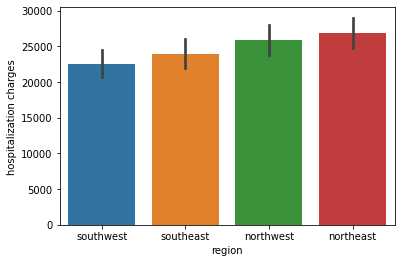

In [29]:
sns.barplot(x="region", y="hospitalization charges", data=df, estimator=np.mean)

<AxesSubplot:xlabel='region', ylabel='viral load'>

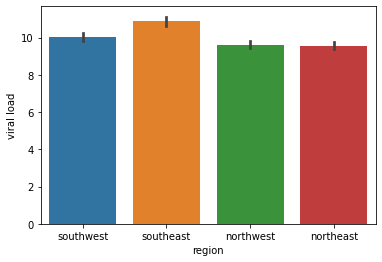

In [30]:
sns.barplot(x="region", y="viral load", data=df, estimator=np.mean)

<AxesSubplot:xlabel='smoker', ylabel='hospitalization charges'>

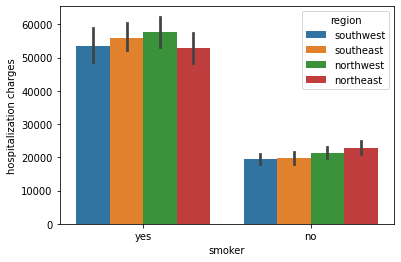

In [31]:
sns.barplot(x="smoker", y="hospitalization charges", hue="region", data=df, estimator=np.mean)

#### Smokers by region

<AxesSubplot:xlabel='region', ylabel='hospitalization charges'>

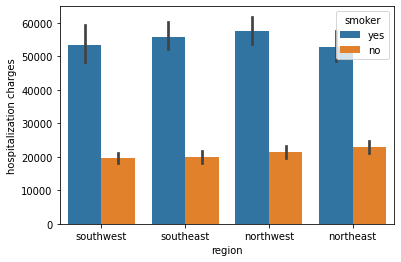

In [32]:
sns.barplot(x="region", y="hospitalization charges", hue="smoker", data=df, estimator=np.mean)

#### Sex vs hospitalization charges by region

<AxesSubplot:xlabel='region', ylabel='hospitalization charges'>

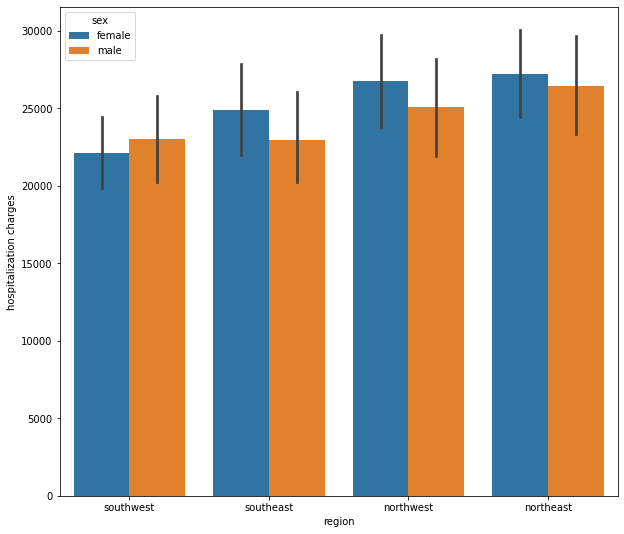

In [33]:
plt.figure(figsize=(10,9))
sns.barplot(x="region", y="hospitalization charges", hue="sex", data=df, estimator=np.mean)

<AxesSubplot:xlabel='sex', ylabel='hospitalization charges'>

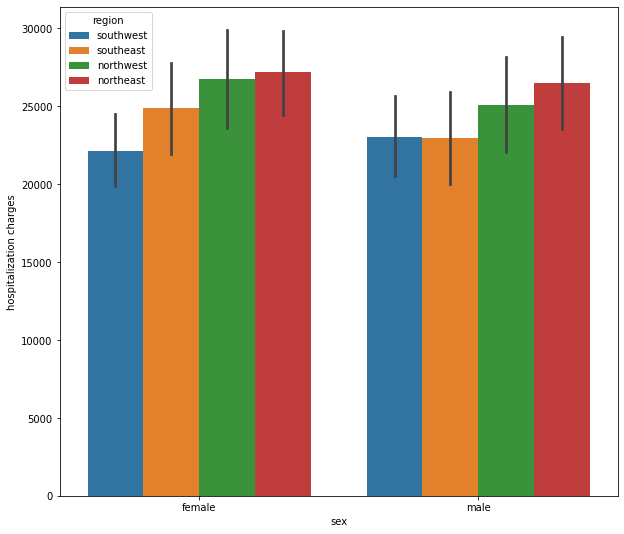

In [34]:
plt.figure(figsize=(10,9))
sns.barplot(x="sex", y="hospitalization charges", hue="region", data=df, estimator=np.mean)

#### Smokers vs viral load by region

<AxesSubplot:xlabel='smoker', ylabel='viral load'>

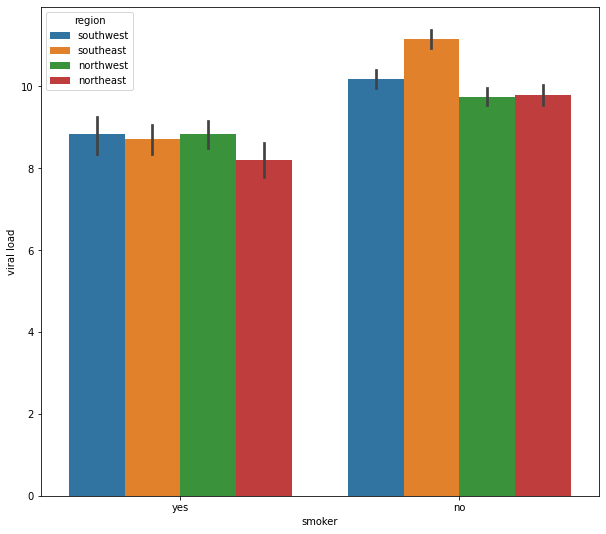

In [35]:
plt.figure(figsize=(10,9))
sns.barplot(x="smoker", y="viral load", hue="region", data=df, estimator=np.mean)

<AxesSubplot:xlabel='region', ylabel='viral load'>

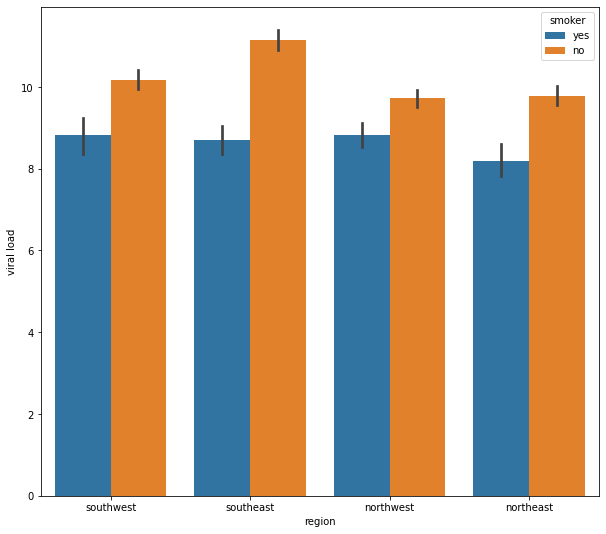

In [36]:
plt.figure(figsize=(10,9))
sns.barplot(x="region", y="viral load", hue="smoker", data=df, estimator=np.mean)

#### Sex vs viral load by region

<AxesSubplot:xlabel='sex', ylabel='viral load'>

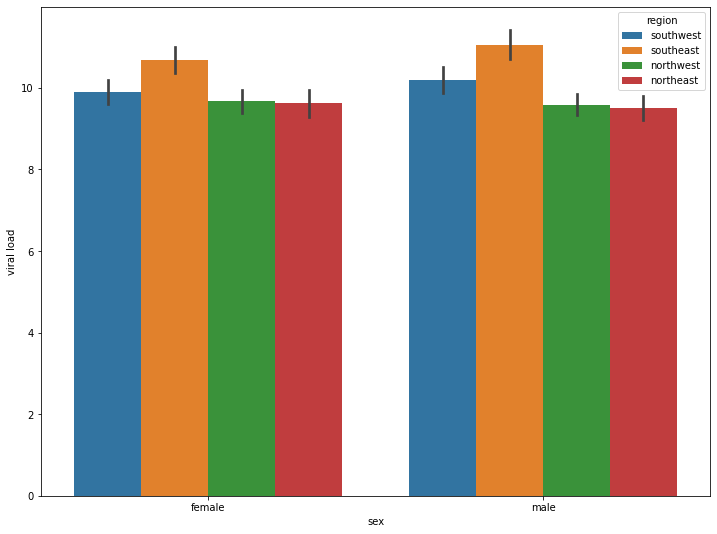

In [37]:
plt.figure(figsize=(12,9))
sns.barplot(x="sex", y="viral load", hue="region", data=df, estimator=np.mean)

<AxesSubplot:xlabel='region', ylabel='viral load'>

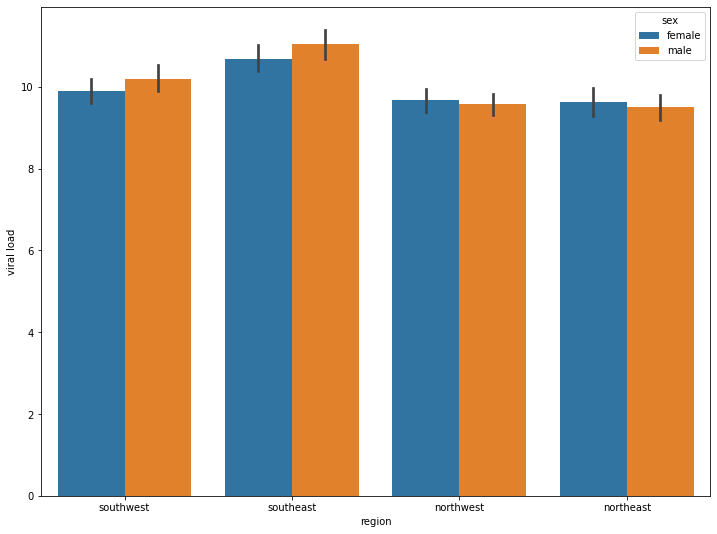

In [38]:
plt.figure(figsize=(12,9))
sns.barplot(x="region", y="viral load", hue="sex", data=df, estimator=np.mean)

#### Generation vs hospitalization charges by region

<AxesSubplot:xlabel='generation', ylabel='hospitalization charges'>

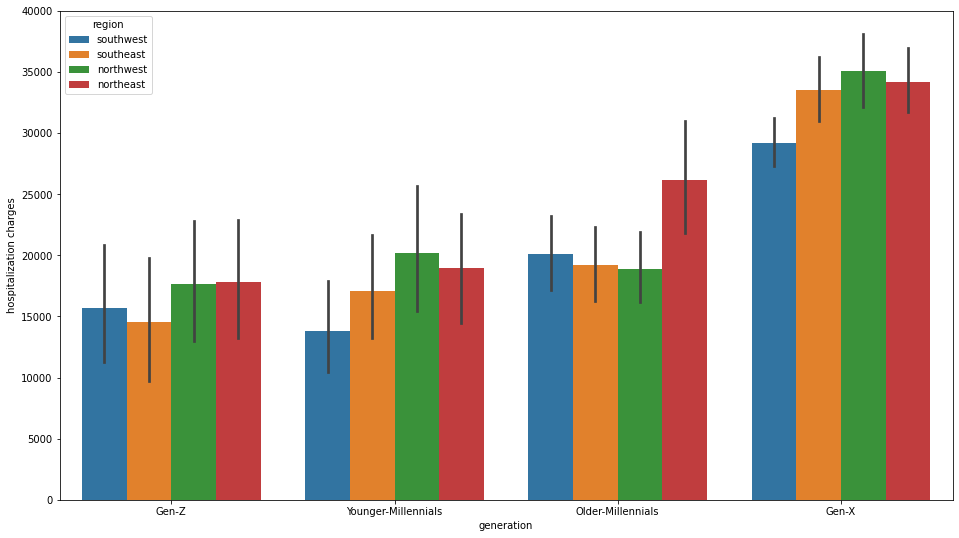

In [39]:
plt.figure(figsize=(16,9))
sns.barplot(x="generation", y="hospitalization charges", hue="region", data=df, estimator=np.mean)

#### region vs hospitalization charges by severity level

<AxesSubplot:xlabel='region', ylabel='hospitalization charges'>

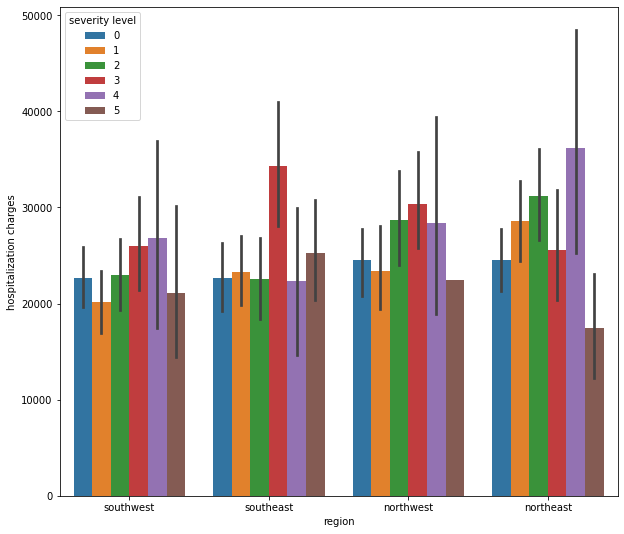

In [40]:
plt.figure(figsize=(10,9))
sns.barplot(x="region", y="hospitalization charges", hue="severity level", data=df, estimator=np.mean)

#### region vs viral load charges by severity level

<AxesSubplot:xlabel='region', ylabel='viral load'>

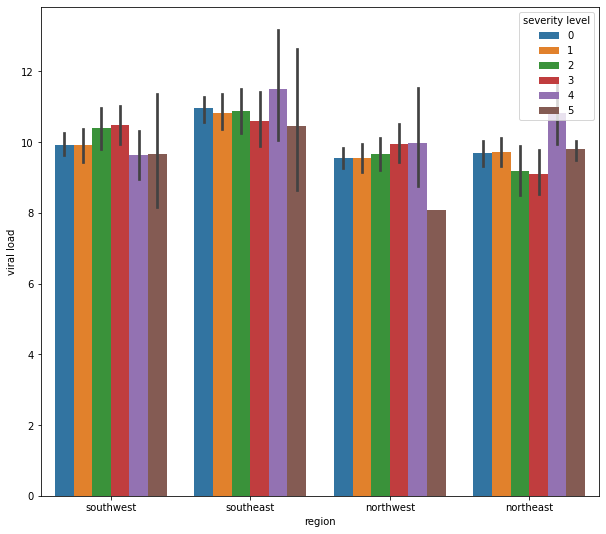

In [41]:
plt.figure(figsize=(10,9))
sns.barplot(x="region", y="viral load", hue="severity level", data=df, estimator=np.mean)

- **Insights on other factors**
 - **Smokers** have average high hospitalization charges
     - **northwest** region has **highest** hospitalization charges among smokers
     - **northeast** and **southwest** have **lowest** hospitalization charges among smokers
 - **Non-Smokers** have **much lesser average hospitalization charges**
      - **northeast** region has **highest** hospitalization charges among non-smokers
      - **southwest** have **lowest** hospitalization charges among non-smokers
 - **Females** have slightly higher average of hospitalization charges in **northeast** region
 - **Average viral load is less among smokers** than that of non-smokers
 - **Generation-X (i.e. Age range beyond 41 years) has most hospitalization charges across regions**
 - **Younger-Millennials**(i.e. Age range between 26 and 32 years) and **Older-Millennials**(i.e. Age range between 33 and 41 years) **experienced relatively more hospitalization charges in southwest** region
 - **northeast** and **southheast** region have experienced severity level 4,5 and more viral loads
 - **southeast** region has experienced severity level 3 and more hospitalization

### Transform categorical features to numeric for checking correlations among features 

In [42]:
from sklearn.preprocessing import LabelEncoder
# Running level encoding for convertion from categorical to numerical data 
# Using level encording for sex and smoker features as there are only two levels 
label_encoder = LabelEncoder()

col='sex'
df[col+'_new'] = label_encoder.fit_transform(df[col])
col='smoker'
df[col+'_new'] = label_encoder.fit_transform(df[col])

In [43]:
df["sex_new"].value_counts(normalize=True)*100

0    51.042535
1    48.957465
Name: sex_new, dtype: float64

In [44]:
df["smoker_new"].value_counts(normalize=True)*100

0    88.490409
1    11.509591
Name: smoker_new, dtype: float64

In [45]:
from category_encoders import TargetEncoder
# Using Target/Response encording for region features as there are more than two levels 
te = TargetEncoder()
col='region'
df[col+'_new'] = te.fit_transform(df[col],df['hospitalization charges'])
df[col+'_new']

0       22553.615120
1       23935.713355
2       23935.713355
3       25908.986885
4       25908.986885
            ...     
1333    25908.986885
1334    26840.658784
1335    23935.713355
1336    22553.615120
1337    25908.986885
Name: region_new, Length: 1199, dtype: float64

In [46]:
col='generation'
df[col+'_wrt_charges_new'] = te.fit_transform(df[col],df['hospitalization charges'])
df[col+'_wrt_charges_new']

0       16429.131673
1       16429.131673
2       17675.408046
3       20959.985437
4       17675.408046
            ...     
1333    32989.921933
1334    16429.131673
1335    16429.131673
1336    16429.131673
1337    32989.921933
Name: generation_wrt_charges_new, Length: 1199, dtype: float64

In [47]:
col='generation'
df[col+'_wrt_viral_load_new'] = te.fit_transform(df[col],df['viral load'])
df[col+'_wrt_viral_load_new']

0        9.789609
1        9.789609
2        9.802011
3        9.963932
4        9.802011
          ...    
1333    10.258606
1334     9.789609
1335     9.789609
1336     9.789609
1337    10.258606
Name: generation_wrt_viral_load_new, Length: 1199, dtype: float64

### Correlation co-effecients - SRCC & PCC

- **Person correlation**
 - Pearson's correlation coefficient, r, is very sensitive to outliers
 - It can have a very large effect on the line of best fit and the Pearson correlation coefficient. 
 - This means — including outliers in your analysis can lead to misleading results.

<AxesSubplot:>

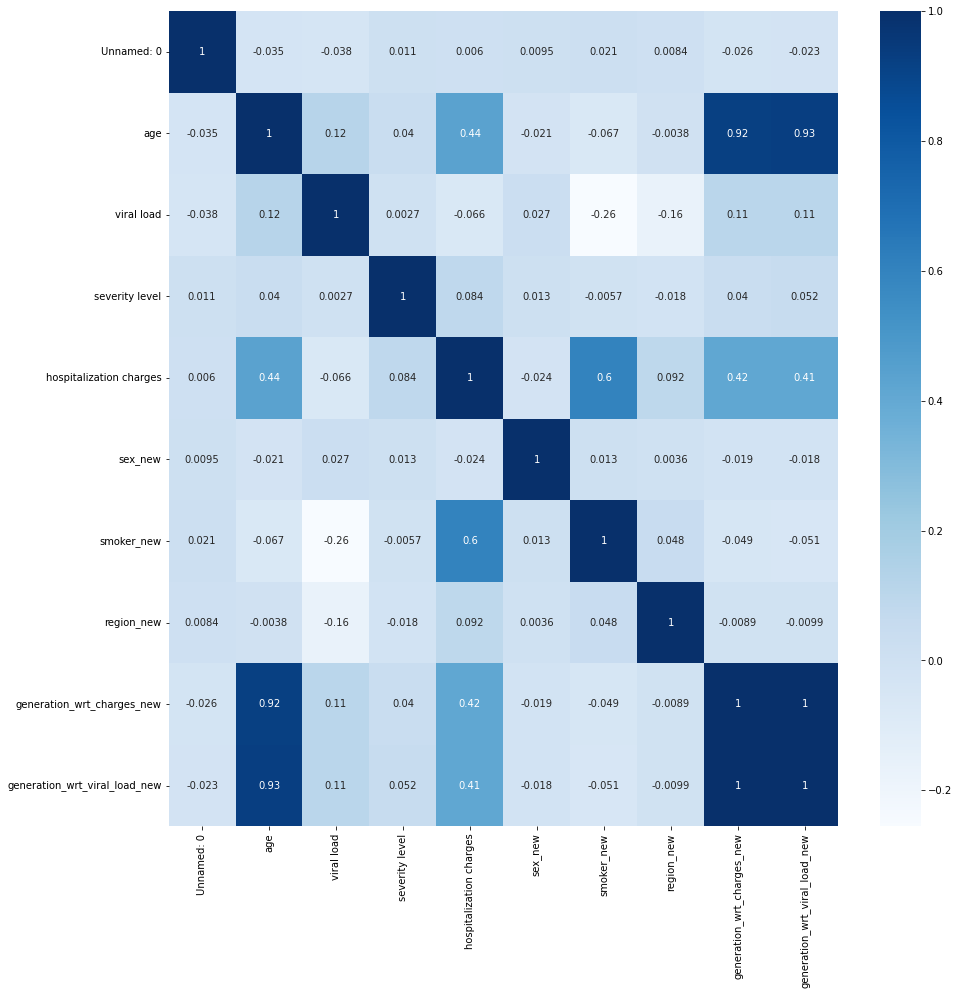

In [48]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(method='pearson'), cmap="Blues", annot=True)

- **Spearman correlation** - Better measure as there are multiple outliers in each groups

<AxesSubplot:>

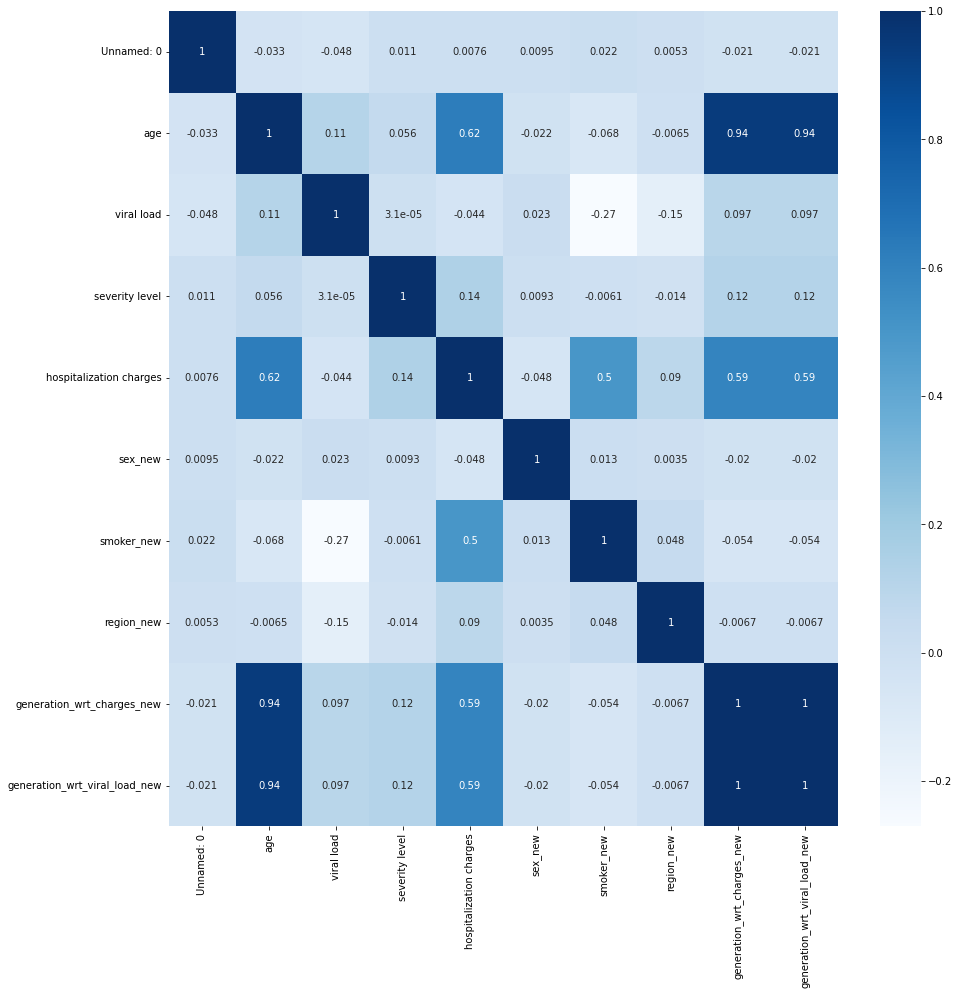

In [49]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(method='spearman'), cmap="Blues", annot=True)

- **Insights** : 
    - High correlation between following variables
        - smokers and "hospitalization charges"
        - age and "hospitalization charges"
        - generation and "hospitalization charges"
        
    - Slight correlation between following variables 
        - viral load and region
        - viral load and age
        - viral and "hospitalization charges"

### Hypothesis Testing

## Prove (or disprove) that the hospitalization charges of people who do smoking are greater than those who don't

- **Sample T-Test** to check if that the **hospitalization charges of people who do smoking are greater than those who don't smoke**
  - **Define H0 and Ha**
      - **Null hypothesis (H0)** : **Group means** of hospitalization charges are **equal** for smoker patient than non-smoker patients
      - **Alternate hypothesis (Ha)** : **Group means** of hospitalization charges **greater** for smoker patient than non-smoker patients

  - **Define experiment and "sensible" (i.e. distribution of test under H0) test statistics**
      - **Two sample T-test (Independent)** . 
          - Note : Could have used z-test as well because sample size is more than 30. However , T-test will be turnout to Z-Test as sample size is large (i.e. more than 10k)
      - Independent T-Test : Two diffrent random variable (i.e. hospitalization charges and smoking)  being tested 
  - **Decide One sided / two-sided tail test**
      - Right tailed test as we're checking greater 
  - **Define alfa (significance level)**
      - Let's assume significance level(alpha value) as 5%
  - **Calculate p-value**

In [55]:
stats.levene(smoker,non_smoker)  # to check the similarity in variance between both samples
# results shows they are not similar

LeveneResult(statistic=0.007902162239645035, pvalue=0.9291809371948934)

In [53]:
smoker = df.loc[df['smoker'] == 'yes']['hospitalization charges']
non_smoker = df.loc[df['smoker'] == 'no']['hospitalization charges']

In [54]:
stats.ttest_ind(smoker,non_smoker,alternative = 'greater',equal_var = False)

Ttest_indResult(statistic=27.183832258556563, pvalue=9.525664158306634e-66)

 - **T-Test Analysis**
   - **Conclusion**
      - Failed to accept Null hypothesis as p/2 value is 0 i.e. less than alpha value .05
      - **Failed to reject the hypothesis and can conclude that hospitalization charges of people who do smoking are greater than those who don't smoke**

## Prove (or disprove) with statistical evidence that the viral load of females is different from that of males

- **Sample T-Test** to check if viral load has an effect on gender(i.e. sex feature)
  - **Define H0 and Ha**
      - **Null hypothesis (H0)** : **Group means** of viral load for male and female are **equal**
      - **Alternate hypothesis (Ha)** : **Group means** of viral load for male and female are **NOT equal**

  - **Define experiment and "sensible" (i.e. distribution of test under H0) test statistics**
      - **Two sample T-test (Independent)** . 
          - Note : Could have used z-test as well because sample size is more than 30. However , T-test will be turnout to Z-Test as sample size is large (i.e. more than 10k)
      - Independent T-Test : Two diffrent random variable (i.e. count and workingday)  being tested 
  - **Decide One sided / two-sided tail test**
      - Two-sided as in Ha the measure is "not equal", we're neither checking greater nor lesser
  - **Define alfa (significance level)**
      - Let's assume significance level(alpha value) as 5%
  - **Calculate p-value**

In [268]:
stats.ttest_ind(df["viral load"],df["sex_new"])

Ttest_indResult(statistic=160.00377687194398, pvalue=0.0)

 - **T-Test Analysis**
   - **Conclusion**
      - Failed to accept Null hupothesis as p value is 0 i.e. less than alpha value .05
      - **Can't reject that viral load is equal across male and female groups**

## Is the proportion of smoking significantly different across different regions? (Chi-square)

- **Chi-square Test** to check if **Smokers are independent across region**
  - **Define H0 and Ha**
      - **Null hypothesis (H0)** : Smokers are in-dependent of the regions
      - **Alternate hypothesis (Ha)** : Smokers are dependent of the regions

  - **Define experiment and "sensible" (i.e. distribution of test under H0) test statistics**
      - **Chi-square Test** . 
  - **Decide One sided / two-sided tail test**
      - Right tail test always as it's going to be positive 
  - **Define alfa (significance level)**
      - Let's assume significance level(alpha value) as 5%
  - **Calculate p-value**

In [269]:
crosstab = pd.crosstab(df['smoker'], df['region_new'])
crosstab

region_new  22553.615120  23935.713355  25908.986885  26840.658784
smoker                                                            
no                   265           272           267           257
yes                   26            35            38            39

In [270]:
chi2_tstats, p_value, dof, expected_frequencies = stats.chi2_contingency(crosstab)
chi2_tstats, p_value, dof, expected_frequencies

(2.974562784179986,
 0.3955637450555718,
 3,
 array([[257.50708924, 271.66555463, 269.89574646, 261.93160967],
        [ 33.49291076,  35.33444537,  35.10425354,  34.06839033]]))

- **Conclusion(Chi-square Test)** : 
    - p-value is much greater than 0.05, hence we failed to reject H0 
    - **Overall smoker group and region are in-dependent**

## Is the mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level the same? 
## Explain your answer with statistical evidence (One way Anova)

#### ANOVA

- **ANOVA Assumptions** : Folllowing assumptions must be verified before applying ANNOVA 
  - 1 - Each group's observations are Gaussian  (Can be verified using **distplot**)
  - 2 - Each group's variance is roughly the same (Can be verified using **histplot** and **levene's test**)
  - 3 - Each observation is independent (can be verified **using Chi-square test**)

### (STEP 1) Verify ANOVA Assumption # 1   -  Group's observations are Gaussian or not 

- **Filtering women's data**

In [271]:
df_women = df[df["sex"] == "female"]
df_women.head()

Unnamed: 0  age     sex smoker     region  viral load  severity level  \
0           0   19  female    yes  southwest        9.30               0   
5           5   31  female     no  southeast        8.58               0   
6           6   46  female     no  southeast       11.15               1   
7           7   37  female     no  northwest        9.25               3   
9           9   60  female     no  northwest        8.61               0   

   hospitalization charges           generation  sex_new  smoker_new  \
0                    42212                Gen-Z        0           1   
5                     9392  Younger-Millennials        0           0   
6                    20601                Gen-X        0           0   
7                    18204    Older-Millennials        0           0   
9                    72308                Gen-X        0           0   

     region_new  generation_wrt_charges_new  generation_wrt_viral_load_new  
0  22553.615120                16429.131673                       9.789609  
5  23935.713355                17675.408046                       9.802011  
6  23935.713355                32989.921933                      10.258606  
7  25908.986885                20959.985437                       9.963932  
9  25908.986885                32989.921933                      10.258606

- **Verifying Filtered category**

In [272]:
df_women["sex_new"].value_counts()

0    612
Name: sex_new, dtype: int64

- **Selecting features such as "viral load","hospitalization charges","severity level**

In [274]:
df_selected= df_women[["viral load","hospitalization charges","severity level"]]
df_selected.head()

viral load  hospitalization charges  severity level
0        9.30                    42212               0
5        8.58                     9392               0
6       11.15                    20601               1
7        9.25                    18204               3
9        8.61                    72308               0

- **Restricting analysis to only 3 severity levels - 0, 1, 2**

In [278]:
df_selected_sev_1_2_3= df_selected[(df_selected["severity level"] == 0) | (df_selected["severity level"] == 1) | (df_selected["severity level"] == 2)]
df_selected_sev_1_2_3.head()

viral load  hospitalization charges  severity level
0         9.30                    42212               0
5         8.58                     9392               0
6        11.15                    20601               1
9         8.61                    72308               0
11        8.76                    69522               0

In [279]:
df_selected_sev_1_2_3["severity level"].value_counts()

0    269
1    147
2    107
Name: severity level, dtype: int64

- **Checking distribution** is Gaussian or not 

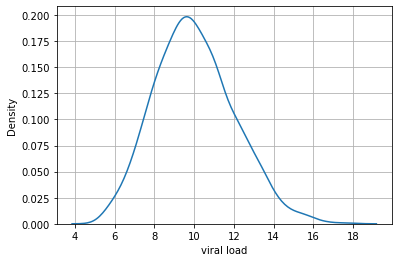

In [280]:
sns.distplot(df["viral load"], hist=False)
plt.grid()

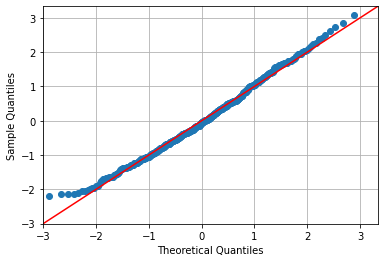

In [282]:
fig = sm.qqplot(df_selected_sev_1_2_3["viral load"], line='45', fit=True)
plt.grid()

- **Observation (on count)** : 
    - **Nearly doesn't follow Gaussian completely**
    - **Conclusion** : **Can apply ANOVA directly** , or need to **apply transform** or **split the data into independent group** before using ANOVA

### (STEP 1.1) Split the data to severity groups

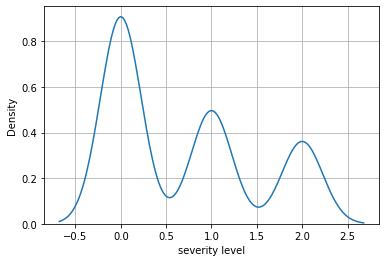

In [283]:
sns.distplot(df_selected_sev_1_2_3["severity level"], hist=False)
plt.grid()

- **Creating samples by severity level 0,1,2**

In [291]:
df_selected_sev_0 = df_selected_sev_1_2_3[df_selected_sev_1_2_3["severity level"] == 0]
df_selected_sev_1 = df_selected_sev_1_2_3[df_selected_sev_1_2_3["severity level"] == 1]
df_selected_sev_2 = df_selected_sev_1_2_3[df_selected_sev_1_2_3["severity level"] == 2]

In [292]:
df_selected["severity level"].value_counts()

0    269
1    147
2    107
3     71
4     10
5      8
Name: severity level, dtype: int64

- **Observation (on severity level)** :
    - severity level is a **discreate random variable** , this distribution won't be useful , **need to focus on "viral load" distribution** of severity level groups , instead of overall severity sample
    - It **also follows multi-modal distribution(will not follow Gaussian ever as Gaussian is applicable for continious random variable )**
    - Multi-modal often means that data has a combination of many different subsets of observations
    - **Next approach** - **Split the data to seperate groups** and see that follows Gaussian and then apply ANOVA if it follows Gaussian 

- **Distribution of Severity group 0, 1, and 2**

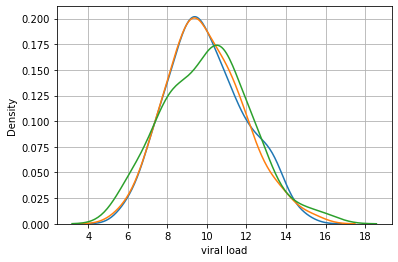

In [293]:
sns.distplot(df_selected_sev_0["viral load"], hist=False)
sns.distplot(df_selected_sev_1["viral load"], hist=False)
sns.distplot(df_selected_sev_2["viral load"], hist=False)

plt.grid()

- **Further Observation (on Viral load)** : 
    - **Doesn't follow pure Gaussian even with individual severity groups**
    - There is a slight **overlap of distibution of three groups**
    - **Conclusion** : **Can't apply ANOVA assuming  the distribution is approximately gaussian** , also can try **apply transform** before using ANOVA 

### (STEP 1.2) Transform distribution to covert to Gaussian 

 - **Box-Cox Transformation** (combined groups)

In [294]:
fitted_data, fitted_lambda = stats.boxcox(df_selected["viral load"])

<AxesSubplot:ylabel='Density'>

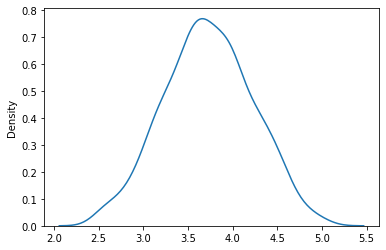

In [295]:
sns.distplot(fitted_data, hist=False)

- QQplot normality check

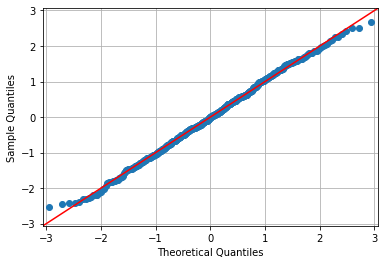

In [296]:
fig = sm.qqplot(fitted_data, line='45', fit=True)
plt.grid()

- **Further Observation (on Weather)** : 
    - **Does follow Gaussian to greater extent**
    - QQ plot shows nearly normal
    - **Conclusion** : **Can apply ANOVA ** , provided other assumptions are satified as well 

 - **Box-Cox Transformation** (Individual groups)

In [297]:
# transform data & save lambda value
df_selected_sev_0_boxcox_transformed, df_selected_sev_0_fitted_lambda = stats.boxcox(df_selected_sev_0["viral load"])
df_selected_sev_1_boxcox_transformed, df_selected_sev_1_fitted_lambda = stats.boxcox(df_selected_sev_1["viral load"])
df_selected_sev_2_boxcox_transformed, df_selected_sev_2_fitted_lambda = stats.boxcox(df_selected_sev_2["viral load"])

 - **Severity Group 0** - **Before and After Boxcox** transformation

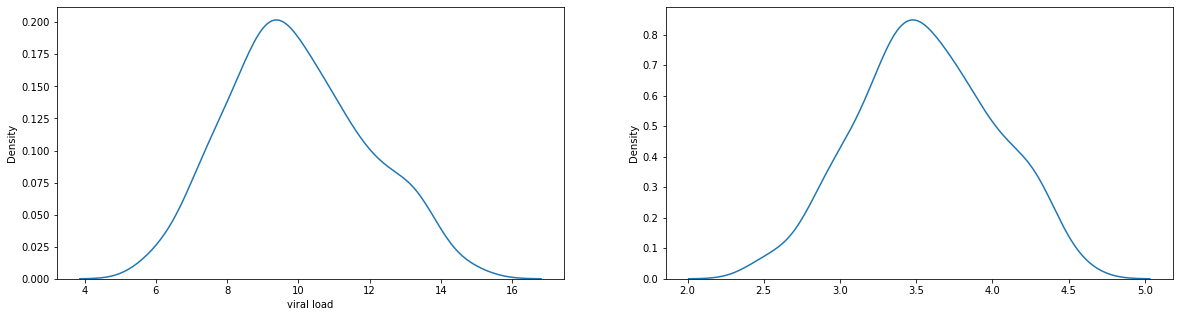

<Figure size 1080x360 with 0 Axes>

In [298]:
fig, ax = plt.subplots(1, 2)
plt.figure(figsize=(15,5))
sns.distplot(df_selected_sev_0["viral load"], hist=False,ax = ax[0])
sns.distplot(df_selected_sev_0_boxcox_transformed, hist=False,ax = ax[1])
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(20)

##### QQplot severity = 0

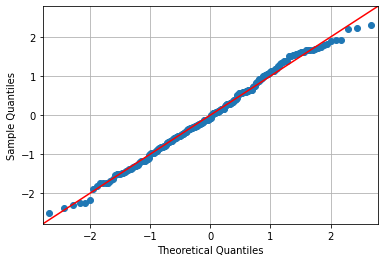

In [299]:
fig = sm.qqplot(df_selected_sev_0_boxcox_transformed, line='45', fit=True)
plt.grid()

 - **Severity Group 1** - **Before and After Boxcox** transformation

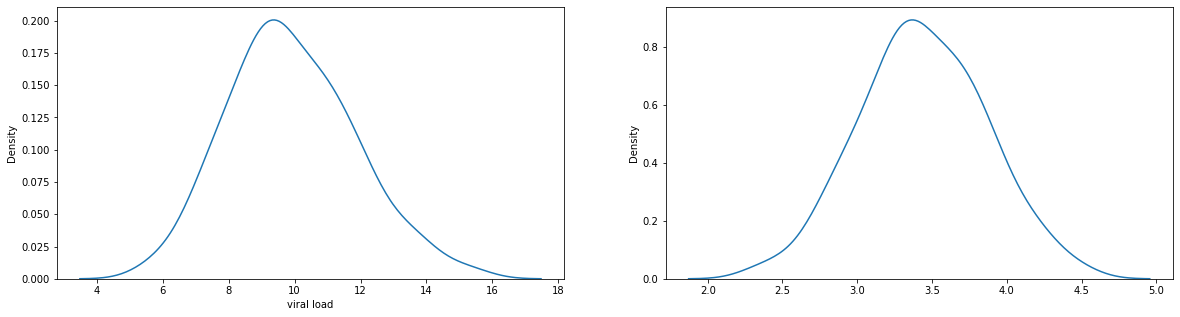

<Figure size 1080x360 with 0 Axes>

In [300]:
fig, ax = plt.subplots(1, 2)
plt.figure(figsize=(15,5))
sns.distplot(df_selected_sev_1["viral load"], hist=False,ax = ax[0])
sns.distplot(df_selected_sev_1_boxcox_transformed, hist=False,ax = ax[1])
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(20)

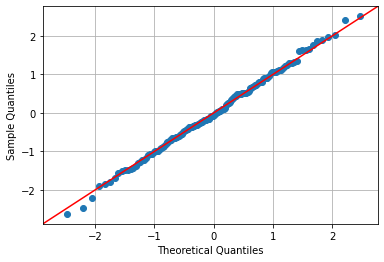

In [301]:
fig = sm.qqplot(df_selected_sev_1_boxcox_transformed, line='45', fit=True)
plt.grid()

 - **Severity Group 2** - **Before and After Boxcox** transformation

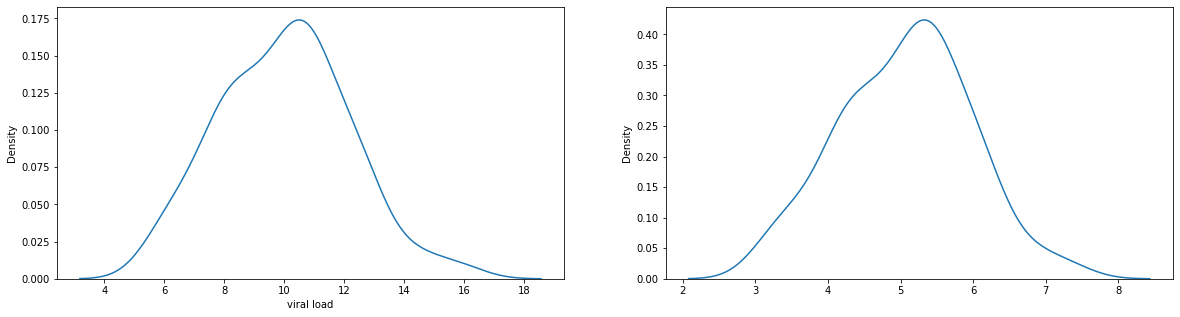

<Figure size 1080x360 with 0 Axes>

In [302]:
fig, ax = plt.subplots(1, 2)
plt.figure(figsize=(15,5))
sns.distplot(df_selected_sev_2["viral load"], hist=False,ax = ax[0])
sns.distplot(df_selected_sev_2_boxcox_transformed, hist=False,ax = ax[1])
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(20)

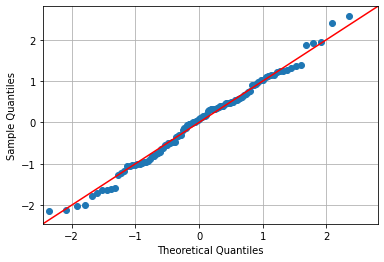

In [303]:
fig = sm.qqplot(df_selected_sev_2_boxcox_transformed, line='45', fit=True)
plt.grid()

- **Observations** 
 - Post transform **severity** category doesn't **follow complete Gaussian** distribution, but to a great extent
 - Can affirm **normality using** other statistical methods such as **Kolmogorov Smirnov test (kstest)** or **Anderson-Darling Normality Test (AD)** 

### (STEP 1.3) Test Normality using other statistical method (As QQPlot doesn't show very conclusive evidence of Normality) 

-  **Kolmogorov Smirnov test (kstest)** - To check Normality of the distribution 

In [304]:
stats.kstest(df_selected_sev_0_boxcox_transformed, 'norm')

KstestResult(statistic=0.9927873106318227, pvalue=0.0)

In [305]:
stats.kstest(df_selected_sev_1_boxcox_transformed, 'norm')

KstestResult(statistic=0.990299830440484, pvalue=2.2781949871400708e-296)

In [306]:
stats.kstest(df_selected_sev_2_boxcox_transformed, 'norm')

KstestResult(statistic=0.9991609738544597, pvalue=0.0)

-  **Anderson-Darling Normality Test (AD)** - To check Normality of the distribution 

In [308]:
stats.anderson(df_selected_sev_0_boxcox_transformed, 'norm')

AndersonResult(statistic=0.4106933799268404, critical_values=array([0.568, 0.647, 0.776, 0.905, 1.076]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [309]:
stats.anderson(df_selected_sev_1_boxcox_transformed, 'norm')

AndersonResult(statistic=0.11375442934306079, critical_values=array([0.561, 0.639, 0.767, 0.895, 1.064]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [310]:
stats.anderson(df_selected_sev_2_boxcox_transformed, 'norm')

AndersonResult(statistic=0.3420373854211931, critical_values=array([0.556, 0.634, 0.76 , 0.887, 1.055]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

- **Interpretation of Anderson test**
 - **Note** : If the returned statistic is lesser than these critical values then for the corresponding significance level, the null hypothesis states that the data come from the Normal distribution can't be rejected.
 - Returned statistics are indeed lesser than critical values for all significance levels , hence **we can't reject H0 i.e. distibution follows Gaussian**  

- **(STEP 1) Conclusion** :
 - **Transformation did help** to convert count distribution **to follow Gaussian distribution** for each groups
 - **Severity Groups followed Gaussian**
   - **QQplot proved the normality to large extent** - as there is deviation from fitted line at the ends
   - **KS Test proved normality**  - as p-value of each group is equal to 0 i.e. less than alpha (0.05)
   - **AD test proved to prove normality** - Returned statistic is lesser than critical values for the corosponding significance level hence the **null hypothesis that the data come from the Normal distribution can be rejected** 
 - **Assumption # 1 for ANOVA did satisfy** hence can use ANOVA, provided other assumption are valid as well

### (STEP 2) Verify ANOVA Assumption # 2 - Group's variance is roughly the same or not

- **Severity**(considered only 0,1,2 severity groups and there was more varience for rest of the severity level groups)

<AxesSubplot:xlabel='viral load', ylabel='Count'>

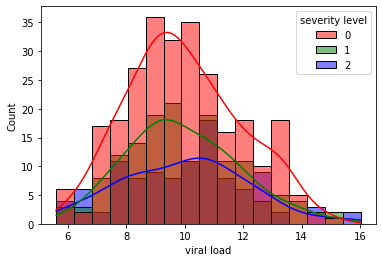

In [311]:
sns.histplot(data=df_selected_sev_1_2_3, x="viral load", hue="severity level",kde=True,palette=['r', 'g', 'b'])

- **Obervations**: 
 - All group's **variance's are not very close to each other** 
 - Need statisctical tools to confirm that
 - Need to use **Levene's test to confirm if variances are same or not** 

- Hypothesis for **Variance test (severity level)**
 - H0 : variance of severity level 0 ==  variance of severity level 1 == variance of severity level 3 come i.e. all groups comes from populations with equal variances.
 - Ha : **variances are not equal**

In [312]:
test_stat, p_values = stats.levene(df_selected_sev_0["viral load"], df_selected_sev_1["viral load"], df_selected_sev_2["viral load"])

In [313]:
test_stat, p_values

(1.0110286977428606, 0.3645585716859747)

- **Obervations**
 - Above p-value suggests that **diff severity level (0,1,2) groups do have equal variances**

- **(STEP 2) Conclusion** :
 - **Assumption # 2 for ANOVA did satisfy** hence can use ANOVA

### (STEP 3) Verify ANOVA Assumption # 3 - Observations are independent or not

- **Chi-square Test** to check if **sex are independent across severity levels**
  - **Define H0 and Ha**
      - **Null hypothesis (H0)** : sex are independent across severity levels
      - **Alternate hypothesis (Ha)** : sex are dependent across severity levels

  - **Define experiment and "sensible" (i.e. distribution of test under H0) test statistics**
      - **Chi-square Test** . 
  - **Decide One sided / two-sided tail test**
      - Right tail test always as it's going to be positive 
  - **Define alfa (significance level)**
      - Let's assume significance level(alpha value) as 5%
  - **Calculate p-value**

In [314]:
crosstab = pd.crosstab(df["sex_new"], df["severity level"])
crosstab

severity level    0    1    2   3   4   5
sex_new                                  
0               269  147  107  71  10   8
1               253  145   99  67  13  10

In [315]:
chi2_tstats, p_value, dof, expected_frequencies = stats.chi2_contingency(crosstab)

In [316]:
chi2_tstats, p_value, dof, expected_frequencies

(1.0234455187076552,
 0.9606526490790347,
 5,
 array([[266.44203503, 149.0442035 , 105.14762302,  70.43869892,
          11.73978315,   9.18765638],
        [255.55796497, 142.9557965 , 100.85237698,  67.56130108,
          11.26021685,   8.81234362]]))

- **(STEP 3) Conclusion(Chi-square Test)** : 
    - p-value is significantly larger than 0.05, hence we failed to reject H0 
    - **Overall severity level and gender are in-dependent**
    - **Assumption # 3 for ANOVA also satisfied** hence can use ANOVA

### One-Way Anova Test

In [318]:
from scipy.stats import f_oneway
f_oneway(df_selected_sev_0["viral load"], df_selected_sev_1["viral load"], df_selected_sev_2["viral load"])

F_onewayResult(statistic=0.07443469817375759, pvalue=0.9282779784079939)

- **(STEP 3) Conclusion(One-Way Anova Test)** : 
    - p-value is significantly larger than 0.05, hence we failed to reject H0 
    - **Mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level the same**

### (STEP 4) Use The Kruskal–Wallis test , a nonparametric alternative approach can also be used along with ANOVA

- **Kruskal–Wallis test** to check if **population median** of all of the **severity groups are equal**
  - **Define H0 and Ha**
      - **Null hypothesis (H0)** : **Population median** of **viral loads** across **severity level groups are equal**
      - **Alternate hypothesis (Ha)** : Population median of all of the severity level are **not equal**

  - **Define experiment and "sensible" (i.e. distribution of test under H0) test statistics**
      - **The Kruskal–Wallis test** . 
  - **Decide One sided / two-sided tail test**
      - Right tail test always as it's going to be positive 
  - **Define alfa (significance level)**
      - Let's assume significance level(alpha value) as 5%
  - **Calculate p-value**
  - **Assumptions**
      - It's **non-parametric test**, hence **no assumptions** 
      - The test works on 2 or more independent samples, which may have different sizes.

In [319]:
stats.kruskal(df_selected_sev_0["viral load"], df_selected_sev_1["viral load"],df_selected_sev_2["viral load"],nan_policy='propagate', axis=0)

KruskalResult(statistic=0.18484697689143956, pvalue=0.9117189653310245)

- **(STEP 4) Conclusion(Kruskal–Wallis test)** : 
    - p-value is much more than 0.05, hence we failed to reject H0 
    - **Population median of viral loads across severity level groups are equal**